In [1]:
# Time-series analysis - March 2024 - Amtrak.csv dataset

In [2]:
# import needed common libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 

In [3]:
# read the Tractor-Sales.csv data file
df = pd.read_csv('Amtrak.csv')
df.head()

,Month,Ridership
0,1/1/1991,1708.917
1,1/2/1991,1620.586
2,1/3/1991,1972.715
3,1/4/1991,1811.665
4,1/5/1991,1974.964


In [4]:
# Convert Month column to date format
df["Date"] = pd.to_datetime(df["Month"], format='%d/%m/%Y')
df


,Month,Ridership,Date
0,1/1/1991,1708.917,1991-01-01
1,1/2/1991,1620.586,1991-02-01
2,1/3/1991,1972.715,1991-03-01
3,1/4/1991,1811.665,1991-04-01
4,1/5/1991,1974.964,1991-05-01
...,...,...,...
154,1/11/2003,2076.054,2003-11-01
155,1/12/2003,2140.677,2003-12-01
156,1/1/2004,1831.508,2004-01-01
157,1/2/2004,1838.006,2004-02-01


In [5]:
# Convert data to time series
rider_ts = pd.Series(df.Ridership.values, index=df.Date, name='Ridership')

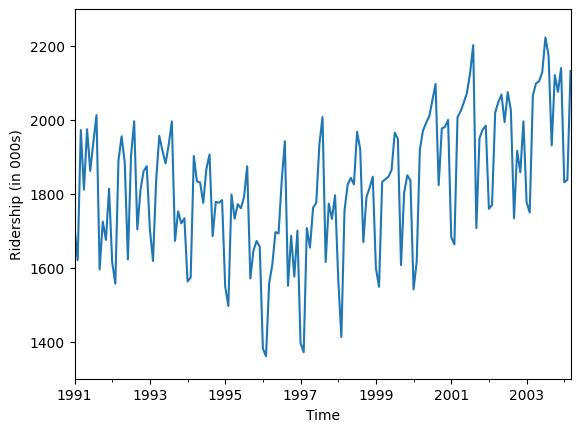

In [6]:
# Plot the time series
# Do you observe any trend and seasonality in the plot?
ax = rider_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
ax.set_ylim(1300,2300)
plt.show()

In [7]:
# Data partition for the time series data
# Keep the last three years data as the validation dataset
nValid = 36
nTrain = len(rider_ts) - nValid
train_ts = rider_ts[:nTrain]
valid_ts = rider_ts[nTrain:]

In [8]:
# Model 1: A linear trend time series model
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
ts_df = tsatools.add_trend(rider_ts,trend='ct')  # "ct" adds both constant and trend
ts_df['Month']=ts_df.index.month

# display updated ts_df
ts_df

,Ridership,const,trend,Month
Date,,,,
1991-01-01,1708.917,1.0,1.0,1
1991-02-01,1620.586,1.0,2.0,2
1991-03-01,1972.715,1.0,3.0,3
1991-04-01,1811.665,1.0,4.0,4
1991-05-01,1974.964,1.0,5.0,5
...,...,...,...,...
2003-11-01,2076.054,1.0,155.0,11
2003-12-01,2140.677,1.0,156.0,12
2004-01-01,1831.508,1.0,157.0,1


In [9]:
# partition data frame into training and validation to run regression
nValid = 36
nTrain = len(rider_ts) - nValid
train_df = ts_df[:nTrain]
valid_df = ts_df[nTrain:]


In [10]:
# fit a linear regression model
rider_lm = sm.ols(formula='Ridership ~ trend',data=train_df).fit()

rider_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7456
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.390
Time:                        18:05:09   Log-Likelihood:                -797.95
No. Observations:                 123   AIC:                             1600.
Df Residuals:                     121   BIC:                             1606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1750.3595     29.073     60.206      0.000    1692.802    1807.917
trend          0.3514      0.407      0.864      0.390      -0.454       1.157
==============================================================================
Omnibus:                        4.293   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.340
Skew:                          -0.435   Prob(JB):                        0.114
Kurtosis:                       2.700   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Evaluate Model1 performance
# ! pip install dmba
# Comment the above install code after dmba library has been installed
from dmba import regressionSummary
predict_lm = rider_lm.predict(valid_df)
regressionSummary(valid_ts,predict_lm)

no display found. Using non-interactive Agg backend

Regression statistics

                      Mean Error (ME) : 193.1316
       Root Mean Squared Error (RMSE) : 239.4863
            Mean Absolute Error (MAE) : 209.4371
          Mean Percentage Error (MPE) : 9.2099
Mean Absolute Percentage Error (MAPE) : 10.1477


In [12]:
# Model 2: A polynomial trend time series model
import numpy as np
rider_lm_poly = sm.ols(formula='Ridership ~ trend + np.square(trend) + np.power(trend,3)',
data=train_df).fit()
rider_lm_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     8.040
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           6.36e-05
Time:                        18:05:09   Log-Likelihood:                -786.98
No. Observations:                 123   AIC:                             1582.
Df Residuals:                     119   BIC:                             1593.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1828.5086     54.969     33.264      0.000    1719.665    1937.352
trend                 -0.5706      3.824     -0.149      0.882      -8.142       7.000
np.square(trend)      -0.0614      0.071     -0.859      0.392      -0.203       0.080
np.power(trend, 3)     0.0006      0.000      1.631      0.106      -0.000       0.001
==============================================================================
Omnibus:                        6.983   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.906
Skew:                          -0.535   Prob(JB):                       0.0316
Kurtosis:                       2.550   Cond. No.                     2.95e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Evaluate Model2 performance
predict_lm_poly = rider_lm_poly.predict(valid_df)
regressionSummary(valid_ts,predict_lm_poly)


Regression statistics

                      Mean Error (ME) : -299.0089
       Root Mean Squared Error (RMSE) : 377.3082
            Mean Absolute Error (MAE) : 319.9268
          Mean Percentage Error (MPE) : -15.5163
Mean Absolute Percentage Error (MAPE) : 16.4978


In [14]:
# Model 3: An additive seasonality model; C(Month) is used to specify Month as a categorical variable
rider_lm_season = sm.ols(formula='Ridership~C(Month)',data=train_df).fit()
rider_lm_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     17.54
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.20e-19
Time:                        18:05:09   Log-Likelihood:                -736.38
No. Observations:                 123   AIC:                             1497.
Df Residuals:                     111   BIC:                             1531.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1573.9722     30.578     51.475      0.000    1513.381    1634.564
C(Month)[T.2]    -42.9302     43.243     -0.993      0.323    -128.620      42.759
C(Month)[T.3]    260.7677     43.243      6.030      0.000     175.078     346.457
C(Month)[T.4]    245.0919     44.311      5.531      0.000     157.286     332.897
C(Month)[T.5]    278.2222     44.311      6.279      0.000     190.417     366.028
C(Month)[T.6]    233.4598     44.311      5.269      0.000     145.654     321.265
C(Month)[T.7]    345.3265     44.311      7.793      0.000     257.521     433.132
C(Month)[T.8]    396.6595     44.311      8.952      0.000     308.854     484.465
C(Month)[T.9]     75.7615     44.311      1.710      0.090     -12.044     163.567
C(Month)[T.10]   200.6076     44.311      4.527      0.000     112.802     288.413
C(Month)[T.11]   192.3552     44.311      4.341      0.000     104.550     280.161
C(Month)[T.12]   230.4151     44.311      5.200      0.000     142.610     318.221
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.452
Skew:                          -0.145   Prob(JB):                        0.798
Kurtosis:                       2.937   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Evaluate Model3 performance
predict_lm_season = rider_lm_season.predict(valid_df)
regressionSummary(valid_ts, predict_lm_season)


Regression statistics

                      Mean Error (ME) : 217.9267
       Root Mean Squared Error (RMSE) : 229.6509
            Mean Absolute Error (MAE) : 217.9267
          Mean Percentage Error (MPE) : 10.8646
Mean Absolute Percentage Error (MAPE) : 10.8646


In [16]:
# Model 4: A model with trend and seasonality
modelfomula = 'Ridership ~ trend + C(Month)'
rider_lm_trendseason = sm.ols(formula=modelfomula, data=train_df).fit()
rider_lm_trendseason.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     16.42
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.88e-19
Time:                        18:05:09   Log-Likelihood:                -735.19
No. Observations:                 123   AIC:                             1496.
Df Residuals:                     110   BIC:                             1533.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1551.0115     34.215     45.331      0.000    1483.206    1618.818
C(Month)[T.2]    -43.3066     43.022     -1.007      0.316    -128.566      41.953
C(Month)[T.3]    260.0149     43.024      6.043      0.000     174.751     345.279
C(Month)[T.4]    246.2211     44.090      5.584      0.000     158.845     333.597
C(Month)[T.5]    278.9750     44.086      6.328      0.000     191.606     366.344
C(Month)[T.6]    233.8362     44.084      5.304      0.000     146.472     321.201
C(Month)[T.7]    345.3265     44.083      7.833      0.000     257.963     432.690
C(Month)[T.8]    396.2831     44.084      8.989      0.000     308.919     483.648
C(Month)[T.9]     75.0087     44.086      1.701      0.092     -12.360     162.378
C(Month)[T.10]   199.4784     44.090      4.524      0.000     112.102     286.855
C(Month)[T.11]   190.8496     44.095      4.328      0.000     103.463     278.236
C(Month)[T.12]   228.5331     44.102      5.182      0.000     141.133     315.933
trend              0.3764      0.257      1.466      0.145      -0.132       0.885
==============================================================================
Omnibus:                        1.343   Durbin-Watson:                   0.394
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                1.375
Skew:                          -0.243   Prob(JB):                        0.503
Kurtosis:                       2.822   Cond. No.                         862.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Evaluate Model4 performance
predict_lm_trendseason = rider_lm_trendseason.predict(valid_df)
regressionSummary(valid_ts,predict_lm_trendseason)


Regression statistics

                      Mean Error (ME) : 188.0026
       Root Mean Squared Error (RMSE) : 200.7349
            Mean Absolute Error (MAE) : 188.0026
          Mean Percentage Error (MPE) : 9.3574
Mean Absolute Percentage Error (MAPE) : 9.3574


In [18]:
# Visulize Model4
# Blue line for the original time series
# Orange line for the forecasted time series
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,3.75))
train_df.plot(y='Ridership',ax=ax,color='C0',linewidth=2)
valid_df.plot(y='Ridership',ax=ax,color='C0',linewidth=2, linestyle='dashed')
rider_lm_trendseason.predict(train_df).plot(color='C1')
rider_lm_trendseason.predict(valid_df).plot(color='C1',linestyle='dashed')
ax.get_legend().remove()
plt.show()

/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_8441/1689264100.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [19]:
# Model 5: A model with polynomial trend and seasonality
modelfomula = 'Ridership ~ trend + np.square(trend) + C(Month)'
rider_lm_trendseason = sm.ols(formula=modelfomula, data=train_df).fit()
rider_lm_trendseason.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     39.42
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.75e-35
Time:                        18:05:10   Log-Likelihood:                -691.27
No. Observations:                 123   AIC:                             1411.
Df Residuals:                     109   BIC:                             1450.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1696.9794     27.675     61.318      0.000    1642.128    1751.831
C(Month)[T.2]      -43.2458     30.241     -1.430      0.156    -103.182      16.690
C(Month)[T.3]      260.0149     30.242      8.598      0.000     200.076     319.954
C(Month)[T.4]      260.6175     31.021      8.401      0.000     199.135     322.100
C(Month)[T.5]      293.7966     31.020      9.471      0.000     232.316     355.278
C(Month)[T.6]      248.9615     31.020      8.026      0.000     187.481     310.442
C(Month)[T.7]      360.6340     31.020     11.626      0.000     299.153     422.115
C(Month)[T.8]      411.6513     31.021     13.270      0.000     350.169     473.134
C(Month)[T.9]       90.3162     31.022      2.911      0.004      28.831     151.801
C(Month)[T.10]     214.6037     31.024      6.917      0.000     153.115     276.092
C(Month)[T.11]     205.6711     31.026      6.629      0.000     144.178     267.165
C(Month)[T.12]     242.9294     31.029      7.829      0.000     181.430     304.429
trend               -7.1559      0.729     -9.812      0.000      -8.601      -5.710
np.square(trend)     0.0607      0.006     10.660      0.000       0.049       0.072
==============================================================================
Omnibus:                        7.382   Durbin-Watson:                   0.791
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.974
Skew:                          -0.529   Prob(JB):                       0.0306
Kurtosis:                       3.492   Cond. No.                     8.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Evaluate Model5 performance
predict_lm_trendseason = rider_lm_trendseason.predict(valid_df)
regressionSummary(valid_ts,predict_lm_trendseason)


Regression statistics

                      Mean Error (ME) : -126.1654
       Root Mean Squared Error (RMSE) : 153.2507
            Mean Absolute Error (MAE) : 131.7250
          Mean Percentage Error (MPE) : -6.4315
Mean Absolute Percentage Error (MAPE) : 6.6987


In [21]:
# Visulize Model5
# Blue line for the original time series
# Orange line for the forecasted time series
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,3.75))
train_df.plot(y='Ridership',ax=ax,color='C0',linewidth=2)
valid_df.plot(y='Ridership',ax=ax,color='C0',linewidth=2, linestyle='dashed')
rider_lm_trendseason.predict(train_df).plot(color='C1')
rider_lm_trendseason.predict(valid_df).plot(color='C1',linestyle='dashed')
ax.get_legend().remove()
plt.show()

/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_8441/2633247598.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [22]:
# Using pandas to compute the Simple Moving Average (SMA) with a window of 12 months
df['SMA_6'] = df['Ridership'].rolling(window=6).mean()

# Using pandas to compute Exponential Smoothing (ES); here we use a common smoothing factor alpha = 0.2
df['ES_0.2'] = df['Ridership'].ewm(alpha=0.2, adjust=False).mean()

# Show the dataset with the new SMA and ES columns
df[['Ridership', 'SMA_6', 'ES_0.2']].tail()  # Displaying 15 rows to see some of the moving averages starting to form

,Ridership,SMA_6,ES_0.2
154,2076.054,2109.385000,2065.717314
155,2140.677,2111.219333,2080.709251
156,1831.508,2045.912500,2030.869001
157,1838.006,1989.853500,1992.296401
158,2132.446,2023.360167,2020.326321


In [23]:
# Visualize the moving average forecast
x = df["SMA_6"].dropna()
y = df["ES_0.2"]

# Blue line for x
# Orange line for y
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,3.75))
df.plot(y='Ridership', ax=ax,color='C0', linewidth=1)
x.plot(y='SMA_6',ax=ax,color='C1',linewidth=1, linestyle='dotted')
y.plot(y='ES_0.2',ax=ax,color='C2',linewidth=1, linestyle='dashed')
plt.show()

/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_8441/2856352295.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
